# 拟合与插值

## 拟合

曲线拟合可以用[scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve%5Ffit.html).

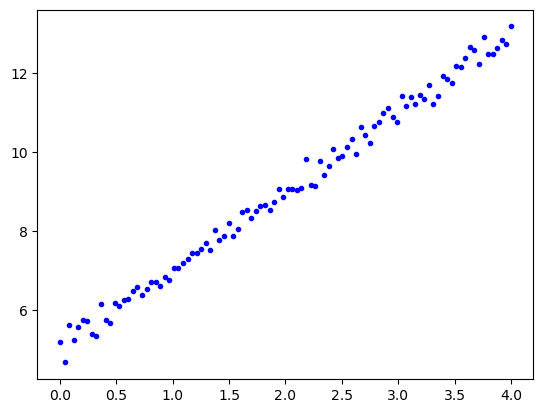

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def linear_f(x, k, b):
    return k * x + b
    
xdata = np.linspace(0, 4, 100)
y = linear_f(xdata, 2, 5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y  + y_noise
plt.plot(xdata, ydata, 'b.', label='data')

### 直线的拟合

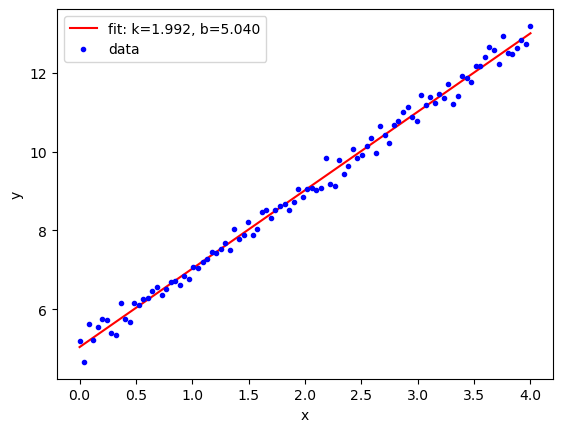

In [2]:
popt, pcov = curve_fit(linear_f, xdata, ydata)
plt.plot(xdata, linear_f(xdata, *popt), 'r-',
         label='fit: k=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b.', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 曲线的拟合

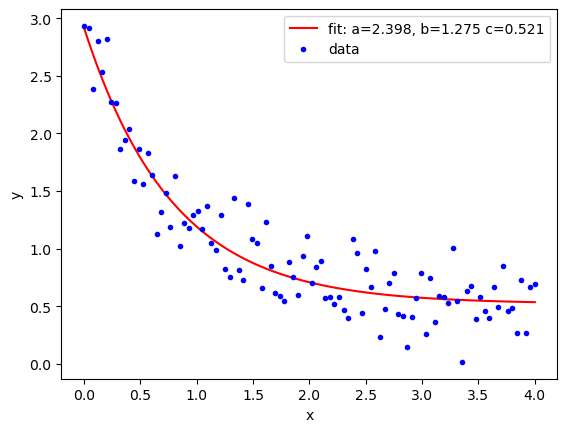

In [3]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f c=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b.', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 插值

- 与拟合的区别

### 线性插值


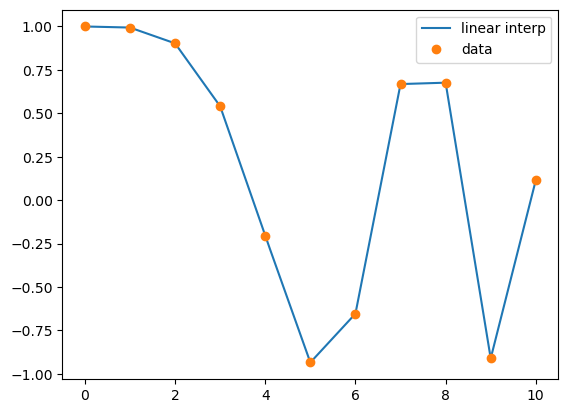

In [4]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)
xnew = np.linspace(0, 10, num=1001)
ynew = np.interp(xnew, x, y)
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

### 三阶样条

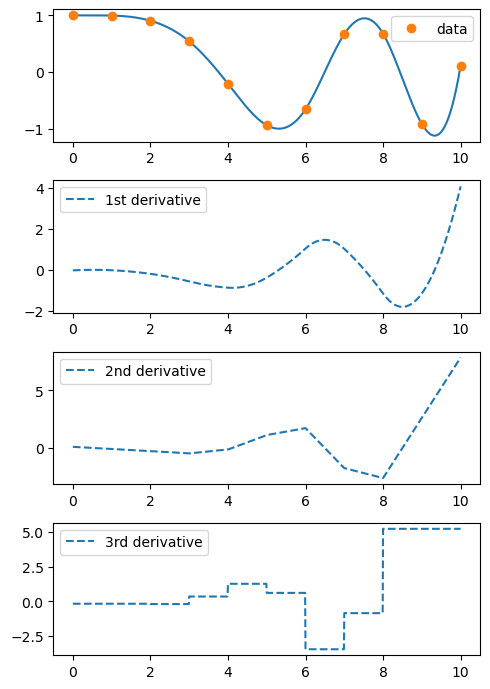

In [5]:
from scipy.interpolate import CubicSpline
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.)
spl = CubicSpline(x, y)
fig, ax = plt.subplots(4, 1, figsize=(5, 7))
xnew = np.linspace(0, 10, num=1001)
ax[0].plot(xnew, spl(xnew))
ax[0].plot(x, y, 'o', label='data')
ax[1].plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')
ax[2].plot(xnew, spl(xnew, nu=2), '--', label='2nd derivative')
ax[3].plot(xnew, spl(xnew, nu=3), '--', label='3rd derivative')
for j in range(4):
    ax[j].legend(loc='best')
plt.tight_layout()
plt.show()

### B样条

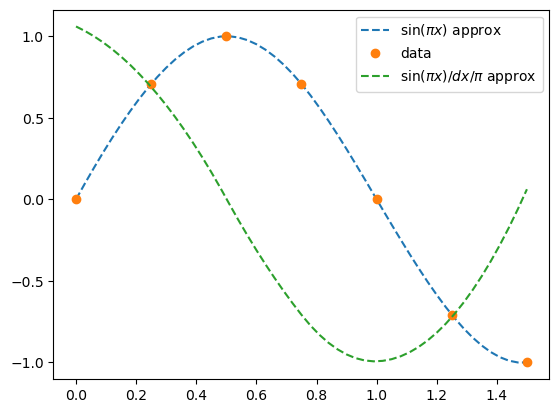

In [6]:
from scipy.interpolate import make_interp_spline

x = np.linspace(0, 3/2, 7)
y = np.sin(np.pi*x)
bspl = make_interp_spline(x, y, k=3)
der = bspl.derivative()      # a BSpline representing the derivative
xx = np.linspace(0, 3/2, 51)
plt.plot(xx, bspl(xx), '--', label=r'$\sin(\pi x)$ approx')
plt.plot(x, y, 'o', label='data')
plt.plot(xx, der(xx)/np.pi, '--', label=r'$\sin(\pi x)/dx / \pi$ approx')
plt.legend()
plt.show()

## 样条还是插值？

以下是浙江省2000年至2010年的人口变化表格：

|年份|总人口数（万人）|
|:--:|:--:|
|2000|4501.22|
|2001|4519.84|
|2002|4535.98|
|2003|4551.58|
|2004|4577.22|
|2005|4602.11|
|2006|4629.43|
|2007|4659.34|
|2008|4687.85|
|2009|4716.18|
|2010|4748.05|

试用不同的函数对其进行拟合或插值，并画图显示其变化趋势。

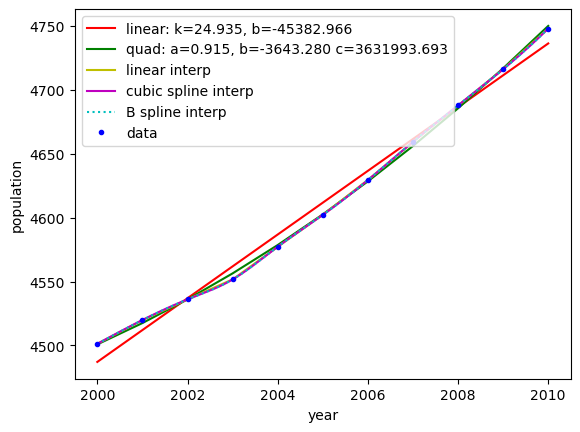

In [7]:
year = np.arange(2000, 2011)
population = [4501.22, 4519.84, 4535.98, 4551.58, 4577.22, 4602.11, 4629.43, 4659.34, 4687.85, 4716.18, 4748.05]

def quad(x, a, b, c):
    return a * x * x + b * x + c

# Linear fitting
popt, pcov = curve_fit(linear_f, year, population)
plt.plot(year, linear_f(year, *popt), 'r-',
         label='linear: k=%5.3f, b=%5.3f' % tuple(popt))

# Quadratic fitting
popt, pcov = curve_fit(quad, year, population)
plt.plot(year, quad(year, *popt), 'g-',
         label='quad: a=%5.3f, b=%5.3f c=%5.3f' % tuple(popt))

# Linear interpolation
year_new = np.linspace(2000, 2010, 3600)
population_new = np.interp(year_new, year, population)
plt.plot(year_new, population_new, 'y-', label='linear interp')

# Cubic spline
from scipy.interpolate import CubicSpline
spl = CubicSpline(year, population)
population_new = spl(year_new)
plt.plot(year_new, population_new, 'm-', label='cubic spline interp')

# B-spline
from scipy.interpolate import make_interp_spline
bspl = make_interp_spline(year, population, k=3)
population_new = bspl(year_new)
plt.plot(year_new, population_new, 'c:', label='B spline interp')

# Original data
plt.plot(year, population, 'b.', label='data')

plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()